# Your info

Full name: Arman Heydari

Student ID: 97521252

# Q1. Kohonen

first we should download our input image and load it as a numpy array.

In [64]:
# Q1_graded
import cv2
!wget -N -q 'https://github.com/armanheydari/my-datas/raw/master/input.jpg'
input_image = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
print("input numpy array's shape:", input_image.shape)

input numpy array's shape: (64, 64)


initialisation phase, we create our weight (or map) array. each element of this array represents coordinates of a black dot.

weight_num is our estimation of number of black dots. you can set this hyperparameter with any number.

In [65]:
# Q1_graded
import numpy as np
def initialize_map(weight_num):
  w = np.random.uniform(0, input_image.shape[0], (weight_num, 2))
  return w.astype(int)

this method chooses a sample coordinate of the image and return that. we will need this to train weights.

In [66]:
# Q1_graded
from random import seed, randint
seed(1)
def choose_sample(input):
  x_index = randint(0, input.shape[0]-1)
  y_index = randint(0, input.shape[1]-1)
  sample = input[x_index, y_index]
  index = np.array([x_index, y_index])
  return sample, index

we need to calculate distance between two dots many times in this question. this method will do that between two numpy arrays and returns a float number.

In [67]:
# Q1_graded
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum(np.power(x1-x2, 2)))

the winner neuron is the closest one to the sample. we can find this neuron using this method. this will returns the coordinates of closest weight.

In [68]:
# Q1_graded
def find_closest(sample, w):
  min_distance = float('inf')
  for weight in w:
    d = euclidean_distance(weight, sample)
    if min_distance>d:
      min_distance = d
      closest = weight
  return closest

if we have the sample pixel and it coordinates, the closest neuron to that sample and the weights array then we can simply update weights shich are in the radius of closest neuron with respect to SOFM formulas.

 this method does that and return the new weights. we should call this method on every iteration, surely with a new random sample.

In [69]:
# Q1_graded
def update_weights(sample, index, closest, w):
  for i in range(w.shape[0]):
    interval = euclidean_distance(w[i], closest)
    if interval<radius and sample>0:
      h = np.exp(-interval ** 2 / (2 * (radius ** 2)))
      w[i] = w[i] + sample * h * (index-w[i])
  return w

to show our new generated image, we have to create a numpy array whith white pixels on any coordinates that we don't have a neuron. this method input is weights and returns the generated image.

In [70]:
# Q1_graded
def weights_to_image(w):
  image = 255*np.ones(input_image.shape)
  for [x, y] in w:
    image[x,y] = 0
  return image

we need this method to render 9 images of training steps on a proper way.

In [71]:
# Q1_graded
from matplotlib import pyplot as plt
def render_images(images):
  columns = np.sqrt(len(images))
  rows = len(images)/columns
  fig = plt.figure(figsize=(rows*5, columns*5))
  for i in range(1, len(images)+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1], cmap='gray', vmin=0, vmax=255)
  plt.show()

Hyperparameters:

In [72]:
# Q1_graded
epochs = 20000
weight_num = 22*64
radius = 2.5

this is the main of code. we will run the kohonen network using the above methods. temp is an array retrieved by the input image, with 1 for black pixels and 0 for white pixels. we need this array to use as the learning rate of our training.

epoch 1000 done!
epoch 2000 done!
epoch 3000 done!
epoch 4000 done!
epoch 5000 done!
epoch 6000 done!
epoch 7000 done!
epoch 8000 done!
epoch 9000 done!
epoch 10000 done!
epoch 11000 done!
epoch 12000 done!
epoch 13000 done!
epoch 14000 done!
epoch 15000 done!
epoch 16000 done!
epoch 17000 done!
epoch 18000 done!
epoch 19000 done!
epoch 20000 done!


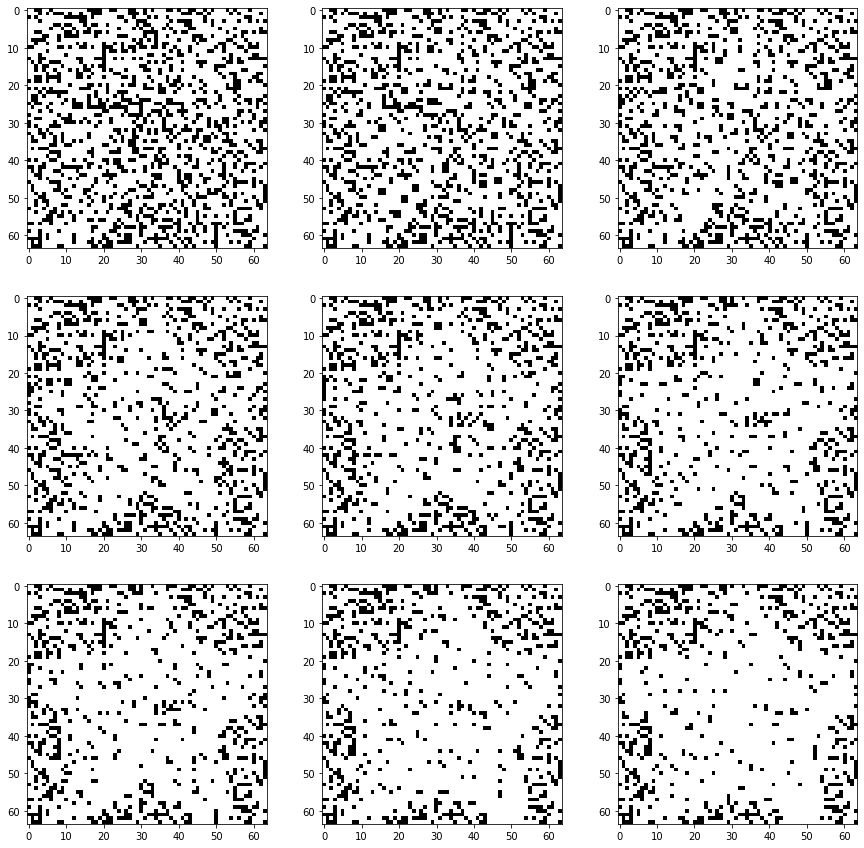

In [73]:
# Q1_graded
images = []
temp = 1-(input_image/255.0)
w = initialize_map(weight_num)
for epoch in range(1, epochs+1):
  sample, index = choose_sample(temp)
  closest = find_closest(index, w)
  w = update_weights(sample, index, closest, w)
  if epoch%1000 == 0:
    print("epoch", epoch, "done!")
  if epoch in [1, epochs/100, epochs/50, epochs/20, epochs/10, epochs/5, epochs/4, epochs/2, epochs]:
    w[w>input_image.shape[0]-1] = input_image.shape[0]-1
    w[w<0] = 0
    images.append(weights_to_image(w))
render_images(images)

# Q2.1 RBF

In [ ]:
# Q2.1_graded
import numpy as np
from keras.layers import Layer
from keras import backend as K
import keras
from matplotlib import pyplot as plt

we define RBF class that we need. we can inherit that from keras layers so we can add it to keras models easily.

In [ ]:
# Q2.1_graded
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

here we initialize our train set and test set. train set is excatly like the project document (figure 6). I assume the 'unknown' class as class 3.

test set is 30 dots in range (0.1,0.1) , (0.8,0.9) that we don't know the labels.

x_train's shape: (29, 2)
y_train's shape: (29,)
x_test's shape: (30, 2)


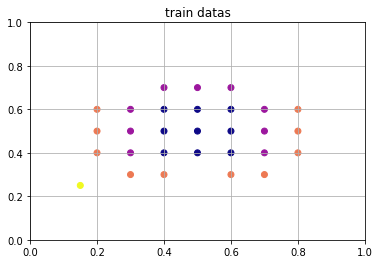

In [ ]:
# Q2.1_graded
x_train = np.array([[0.2, 0.4], [0.2,0.5], [0.2,0.6], [0.3,0.3], [0.4,0.3], [0.6,0.3], [0.7,0.3], [0.8, 0.4], [0.8,0.5], [0.8,0.6],
             [0.3, 0.4], [0.3,0.5], [0.3,0.6], [0.7, 0.4],[0.4,0.7], [0.5,0.7], [0.6,0.7], [0.7,0.5], [0.7,0.6],
             [0.4,0.4], [0.5,0.4], [0.6,0.4], [0.4,0.5], [0.5,0.5], [0.6,0.5], [0.4,0.6], [0.5,0.6], [0.6,0.6], [0.15, 0.25]])
y_train = np.array([2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,3])

x_temp = np.random.uniform(0.1, 0.8, 30)
y_temp = np.random.uniform(0.1, 0.9, 30)
x_test = np.zeros((30,2))
for i in range(0,30):
  x_test[i,0] = x_temp[i]
  x_test[i,1] = y_temp[i]
print("x_train's shape:", x_train.shape)
print("y_train's shape:", y_train.shape)
print("x_test's shape:", x_test.shape)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('train datas')
plt.show()

the we can define,compile and fit our rbf model. 

I just test and choose 15 units for rbf layer. we need a dense layer with 4 units after that for sure. because this is a multiclass problem. and it's better to use softmax activation function and categorical crossentropy loss for the same reason. I prefer to use adam as the optimizer as it's the most used optimizer these days.

I choose epochs=20000 so the model converges.

In [ ]:
# Q2.1_graded
RBF_model = keras.models.Sequential(layers=[
                                            keras.layers.Input(2),
                                            RBFLayer(15, 0.5),
                                            keras.layers.Dense(4, activation='softmax'),                      
])

RBF_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

RBF_history = RBF_model.fit(
    x_train,
    y_train,
    epochs = 20000,
    verbose = 0
)

print("RBF accuracy on train set:", RBF_model.evaluate(x_train, y_train)[1] * 100, "%")

1/1 [==============================] - 0s 149ms/step - loss: 0.4504 - accuracy: 0.9310
RBF accuracy on train set: 93.1034505367279 %


we can see the loss decrease and accuracy increase while training the model on the plotted diagram.

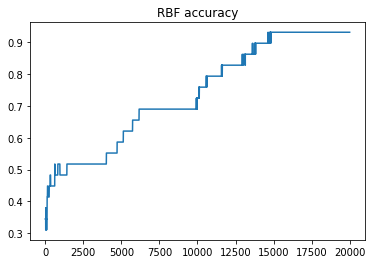

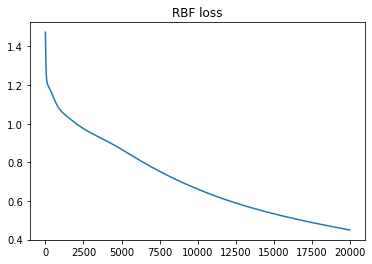

In [ ]:
# Q2.1_graded
plt.plot(RBF_history.history['accuracy'])
plt.title('RBF accuracy')
plt.show()
plt.plot(RBF_history.history['loss'])
plt.title('RBF loss')
plt.show()

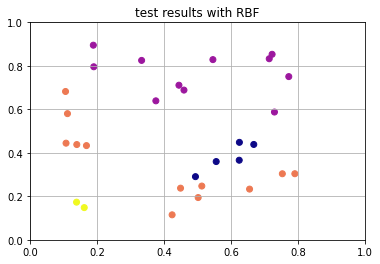

In [ ]:
# Q2.1_graded
y_rbf = np.argmax(RBF_model.predict(x_test), axis=1)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_rbf, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('test results with RBF')
plt.show()

# Q2.2 MLP

now I do the same things for a MLP model. the only difference is the hidden layer which is 'Dense'. a fully connected layer with 15 units again.

I set the activation function to elu because that's apporpriate for hidden layers.

In [ ]:
# Q2.2_graded
MLP_model = keras.models.Sequential(layers=[
                                            keras.layers.Input(2),
                                            keras.layers.Dense(15, activation='elu'),
                                            keras.layers.Dense(4, activation='softmax')                             
])

MLP_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

MLP_history = MLP_model.fit(
    x_train,
    y_train,
    epochs = 20000,
    verbose = 0
)

print("MLP accuracy on train set:", MLP_model.evaluate(x_train, y_train)[1] * 100, "%")

1/1 [==============================] - 0s 432ms/step - loss: 1.7698e-04 - accuracy: 1.0000
MLP accuracy on train set: 100.0 %


we can see the loss decrease and accuracy increase while training the model on the plotted diagram.

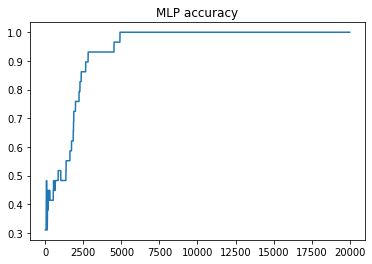

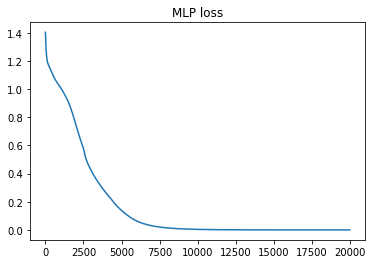

In [ ]:
# Q2.2_graded
plt.plot(MLP_history.history['accuracy'])
plt.title('MLP accuracy')
plt.show()
plt.plot(MLP_history.history['loss'])
plt.title('MLP loss')
plt.show()

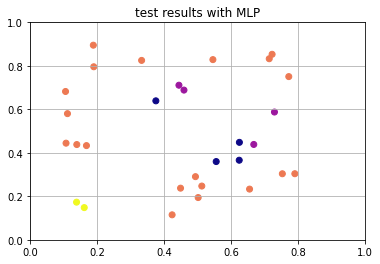

In [ ]:
# Q2.2_graded
y_mlp = np.argmax(MLP_model.predict(x_test), axis=1)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_mlp, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('test results with MLP')
plt.show()

# Q4. Salesman

import requrements and download the dataset:

In [1]:
# Q4_graded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from functools import reduce

!wget -N -q 'https://github.com/armanheydari/my-datas/raw/master/data.csv'

this step is preprocessing the data, which we can have coordinates of our cities on a numpy array after that.

In [2]:
# Q4_graded
data = pd.read_csv('data.csv', header=None)
data = data.to_numpy()
data_no = data.shape[0]
cities = np.zeros((data_no, 2))
for i in range(data_no):
  [index, x, y] = data[i, 0].split(' ')
  cities[i, 0] = float(x)
  cities[i, 1] = float(y)

we need a method to plot results. plot_solution Plots the solution to the Traveling Salesman problem optimized through a Kohonen neural network.

In [3]:
# Q4_graded
def plot_solution(cities, sol):
    plt.figure('Traveling Salesman Problem')
    plt.plot(cities[:, 0], cities[:, 1], 'b*')
    plt.plot(sol[:, 0], sol[:, 1], '-rx')
    plt.title('Traveling Salesman Problem')
    plt.grid()
    plt.show()

here we define a kohonen neural network class. One initialization parameter is required, be it the radius for a circle. 


*   N: amount of neurons.
*   r: radius for initialization in a circle centered around (0,0) (optional).

and about the optimize method in this class which we can say it's the training part of our network. Optimizes the network for the Traveling Salesman problem for a set of C city positions, d distance metric, eta learning constant, sigma initial parameter for the distance metric and Nk runs. and returns optimized neural network array.
*   C: array with the city positions
*   d: distance metric in the neural network space (neighborhood function)
*   eta: learning coefficient
*   Nk: amount of times the optimization method is run
*   sigma: initial distance metric parameter

In [4]:
# Q4_graded
class KohonenNN(object):
    def __init__(self, N, r=None):
        self.N = N
        if r is not None:
            self.r = r * np.random.rand()
            self.w = self.r * np.array(list(map(lambda theta: (cos(2 * pi * theta) + 0.5, sin(2 * pi * theta) + 0.5),
                                                np.linspace(0, 2 * pi, N))))
        else:
            self.r = np.random.rand()  # I assume r == 1.
            self.w = self.r * np.array(list(map(lambda theta: (cos(2 * pi * theta) + 0.5, sin(2 * pi * theta) + 0.5),
                                                np.linspace(0, 2 * pi, N))))

    def optimize(self, C, d, eta, Nk, sigma):
        for k in range(Nk):
          sigma -= (0.3 * self.N - 0.001 * self.N) / Nk
          for j in np.random.permutation(int(self.N / 2)):
              r_min = np.argmin(np.linalg.norm(self.w - C[j], axis=1))
              for i in range(self.N):
                  self.w[i] += eta * d(i, r_min, sigma) * (C[j] - self.w[i])
        return self.w

here is the main part of this code. we initialize hyperparameters and run our algorithm.

iteration 400 done!


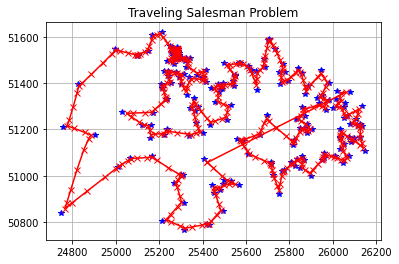


iteration 800 done!


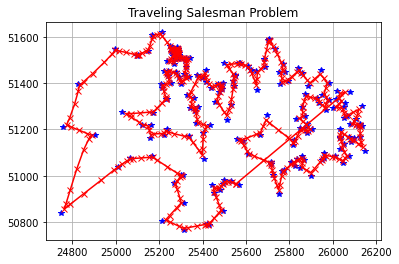


iteration 1200 done!


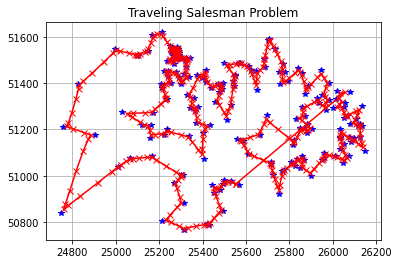


iteration 1600 done!


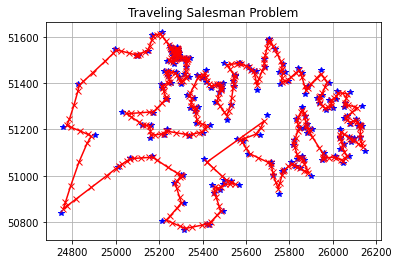


iteration 2000 done!


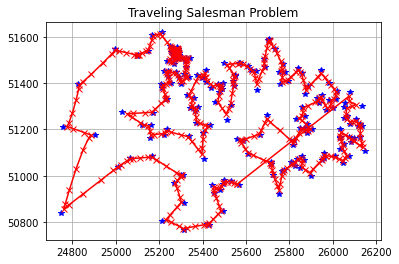

In [11]:
# Q4_graded
N = cities.shape[0] * 2
eta = 0.2
Nk = 2000
sigma = 0.3 * N
dist = lambda r, r_min, s: np.exp(-(np.abs(r - r_min)**2) / (2 * s**2)) # neighborhood function

KohNN = KohonenNN(N, r=1.0)
for i in range(1, 6):
  KohNN.optimize(cities, dist, eta, int(Nk/5), sigma)
  sol = np.vstack((KohNN.w, KohNN.w[0, :]))
  print("iteration", i*int(Nk/5), "done!")
  plot_solution(cities, sol)
  print()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/yVqZzpw/2.jpg)
  
    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI001_HW2.ipynb`
    - `Q1.py`
    - `Q2.1.py`
    - `Q2.2.py`
    - `Q4.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.